In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import re
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features 
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from warnings import filterwarnings
filterwarnings('ignore')
sns.set()

In [2]:
# import plotly.express as px
# import plotly.graph_objects as go


In [3]:
df = pd.read_csv('train-data.csv') #creating the dataframe called "df"
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.columns # column names of the dataset

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [5]:
df.info() # information of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.drop(["Unnamed: 0"],axis=1,inplace=True) #removing unnecessary "Unnamend: 0" column

In [7]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Data Preprocessing
* Engine, Mileage and Power features contains strings inside like "CC" and "bhp" so those must be dropped and type conversion for all those columns is needed.
* Some features contains not possible values, for instance 'Seats' contains 0 so that sort of anomalies must be solved.

In [8]:
df['Engine'] = df['Engine'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
df['Mileage'] = df['Mileage'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
df['Power'] = df['Power'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

#dropping strings in Engine,Mileage and Power features' rows.

In [9]:
df['Power'] = pd.to_numeric(df['Power'], errors ='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors ='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors ='coerce')

#type conversions string into numeric type

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Dealing with Missing Values

In [11]:
percent_missing = round(df.isnull().sum() * 100 / len(df),3)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False).head(15)

# "New_Price" feature contains about 86% of missing values inside it, will be dropped.
# Power, Seats, Engine and Mileage features have a few missing values so filling with median method will be used to fix it.

,Missing_Percentage
New_Price,86.310
Power,2.376
Seats,0.698
Engine,0.598
Mileage,0.033
Name,0.000
Location,0.000
Year,0.000
Kilometers_Driven,0.000
Fuel_Type,0.000


In [12]:
df.drop(["New_Price"],axis=1,inplace=True) #removing "New_Price" column

In [13]:
df["Engine"] = df["Engine"].fillna(df["Engine"].median())
df["Power"] = df["Power"].fillna(df["Power"].median())
df["Seats"] = df["Seats"].fillna(df["Seats"].median())
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median())

# Filling missing values with their median values

In [14]:
df.isnull().sum() # No more missing values

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Dealing with Duplicated Values

In [15]:
df.duplicated().any() # No duplication in the dataset so we don't need to do something.

False

## Feature Engineering

In [16]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0]) # Taking the brand name of the producer company from "Name" feature
df.drop(['Name'],axis=1,inplace=True) # dropping 'Name' feature after creating "Brand" new feature
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [17]:
df["Brand"].unique()
#There are two features that have the same brand but named as 'Isuzu' and 'ISUZU' so we must deal with this problem as well.

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [18]:
df['Brand'] = df['Brand'].str.upper()
# Making uppercase all those features will solve the issue here.

In [19]:
df["Brand"].unique()
# No more that sort of problems in the dataset.

array(['MARUTI', 'HYUNDAI', 'HONDA', 'AUDI', 'NISSAN', 'TOYOTA',
       'VOLKSWAGEN', 'TATA', 'LAND', 'MITSUBISHI', 'RENAULT',
       'MERCEDES-BENZ', 'BMW', 'MAHINDRA', 'FORD', 'PORSCHE', 'DATSUN',
       'JAGUAR', 'VOLVO', 'CHEVROLET', 'SKODA', 'MINI', 'FIAT', 'JEEP',
       'SMART', 'AMBASSADOR', 'ISUZU', 'FORCE', 'BENTLEY', 'LAMBORGHINI'],
      dtype=object)

In [20]:
df['Brand'].value_counts()
# Some of the brands have really less samples, they can be caused outlier problem so we must drop those rows.

MARUTI           1211
HYUNDAI          1107
HONDA             608
TOYOTA            411
MERCEDES-BENZ     318
VOLKSWAGEN        315
FORD              300
MAHINDRA          272
BMW               267
AUDI              236
TATA              186
SKODA             173
RENAULT           145
CHEVROLET         121
NISSAN             91
LAND               60
JAGUAR             40
FIAT               28
MITSUBISHI         27
MINI               26
VOLVO              21
PORSCHE            18
JEEP               15
DATSUN             13
FORCE               3
ISUZU               3
AMBASSADOR          1
BENTLEY             1
LAMBORGHINI         1
SMART               1
Name: Brand, dtype: int64

In [21]:
df['Brand'].value_counts()[df['Brand'].value_counts()<5] # Brands that have less than 5 samples

FORCE          3
ISUZU          3
AMBASSADOR     1
BENTLEY        1
LAMBORGHINI    1
SMART          1
Name: Brand, dtype: int64

In [22]:
i = df['Brand'].value_counts()[df['Brand'].value_counts()<5].index
index = df[df['Brand'].isin(i)].index
df.drop(index,axis=0,inplace=True)

# dropping those samples by their indexes

In [23]:
df['Brand'].value_counts()[df['Brand'].value_counts()<5] # No more rows that counts less than 5.

Series([], Name: Brand, dtype: int64)

## Dealing with Data Issues

### 1- 'Seats' Feature

In [24]:
df['Seats'].value_counts()
#0 seats cars won't be possible in real life, must be dropped that value.

5.0     5053
7.0      670
8.0      134
4.0       98
6.0       31
2.0       14
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [25]:
df.drop(df[df['Seats']==0].index,axis=0,inplace=True) # dropping the rows contains 0 seats

### 2- 'Year' Feature

In [26]:
df['Year'].value_counts()

2014    794
2015    744
2016    741
2013    649
2017    585
2012    579
2011    465
2010    342
2018    297
2009    198
2008    173
2007    125
2019    102
2006     77
2005     57
2004     31
2003     16
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

In [27]:
df['Year']=df['Year'].astype(str) #Year feature is transformed into string from integer.
df['Year']=np.where(df['Year'].astype(int)<2004,"Less than 2004",df['Year']) 
# if the year is less than 2004, called the rows as "Less than 2004"

In [28]:
df['Year'].value_counts() # New value called "Less than 2004" is created

2014              794
2015              744
2016              741
2013              649
2017              585
2012              579
2011              465
2010              342
2018              297
2009              198
2008              173
2007              125
2019              102
2006               77
2005               57
Less than 2004     49
2004               31
Name: Year, dtype: int64

### 3- 'Fuel_Type' Feature

In [29]:
df.Fuel_Type.value_counts() # CNG, LPG and Electric rows can be grouped.

Diesel      3197
Petrol      2743
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [30]:
df['Fuel_Type']=np.where(df["Fuel_Type"].str.contains("CNG|LPG|Electric"),'Other',df["Fuel_Type"]) # Grouped as "Other"

In [31]:
df.Fuel_Type.value_counts()

Diesel    3197
Petrol    2743
Other       68
Name: Fuel_Type, dtype: int64

### 4- 'Owner_Type' Feature

In [32]:
df.Owner_Type.value_counts()

First             4921
Second             967
Third              111
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [33]:
df['Owner_Type']=np.where(df["Owner_Type"].str.contains("Third|Fourth & Above"),'Other',df["Owner_Type"]) 

In [34]:
df.Owner_Type.value_counts()

First     4921
Second     967
Other      120
Name: Owner_Type, dtype: int64

In [35]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,Other,Manual,First,26.60,998.0,58.16,5.0,1.75,MARUTI
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,HYUNDAI
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,HONDA
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,MARUTI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,AUDI


In [36]:
df.info() # All data types are fixed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6008 non-null   object 
 1   Year               6008 non-null   object 
 2   Kilometers_Driven  6008 non-null   int64  
 3   Fuel_Type          6008 non-null   object 
 4   Transmission       6008 non-null   object 
 5   Owner_Type         6008 non-null   object 
 6   Mileage            6008 non-null   float64
 7   Engine             6008 non-null   float64
 8   Power              6008 non-null   float64
 9   Seats              6008 non-null   float64
 10  Price              6008 non-null   float64
 11  Brand              6008 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 610.2+ KB


In [37]:
df.describe().T #statistical measurement of the numeric features
# Kilometers_Driven and Engine features have too much standard deviation, must be scaled.

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,6008.0,58750.326232,91340.023790,171.00,34000.0,53000.50,73000.00,6500000.00
Mileage,6008.0,18.146881,4.572386,0.00,15.2,18.16,21.10,33.54
Engine,6008.0,1618.277630,594.666143,72.00,1198.0,1493.00,1968.00,5461.00
Power,6008.0,112.723612,52.694872,34.20,78.0,97.70,138.03,550.00
Seats,6008.0,5.277963,0.800554,2.00,5.0,5.00,5.00,10.00
Price,6008.0,9.451312,11.085951,0.44,3.5,5.63,9.95,160.00


## Exploratory Data Analysis - Data Visualization
* 2014,2015,2016,2013 and 2017 are the years that have most samples in the given dataset.
* The cars that used Diesel and Petrol are close to each other but also there are a few samples that uses CNG,LPG or Electric.
* Mumbai, Hyderabad and Kochi are the first three cities that have the majority of the samples from.
* Manual cars are about 3 times more than Automatic ones.
* Most of the cars are first hand.
* MARUTI,HYUNDAI and HONDA are the most popular three cars according to the given dataset.

### Categorical Variable Analysis

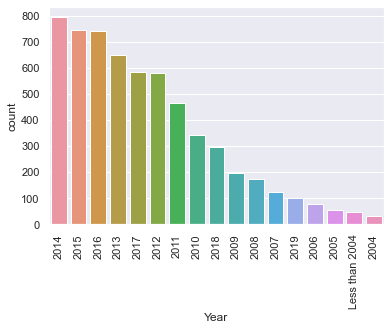

2014              794
2015              744
2016              741
2013              649
2017              585
2012              579
2011              465
2010              342
2018              297
2009              198
2008              173
2007              125
2019              102
2006               77
2005               57
Less than 2004     49
2004               31
Name: Year, dtype: int64


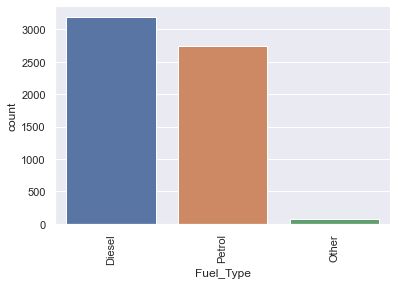

Diesel    3197
Petrol    2743
Other       68
Name: Fuel_Type, dtype: int64


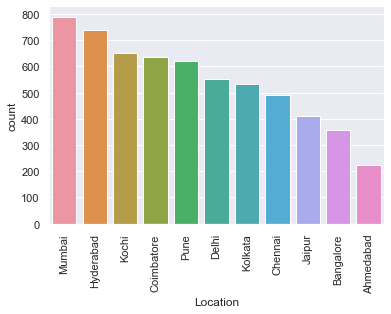

Mumbai        790
Hyderabad     740
Kochi         651
Coimbatore    635
Pune          621
Delhi         553
Kolkata       533
Chennai       492
Jaipur        411
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64


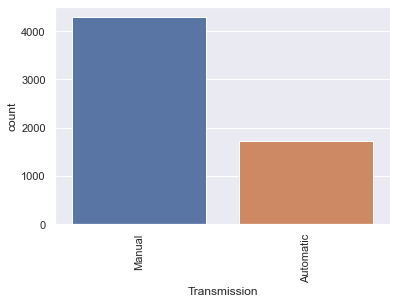

Manual       4293
Automatic    1715
Name: Transmission, dtype: int64


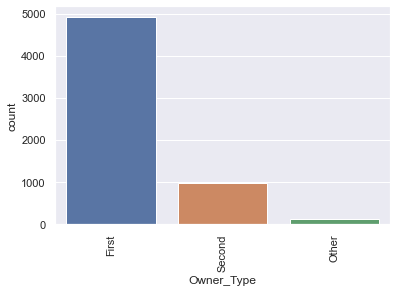

First     4921
Second     967
Other      120
Name: Owner_Type, dtype: int64


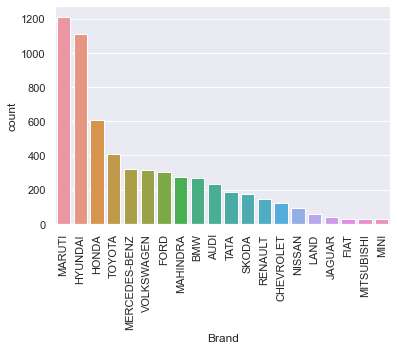

MARUTI           1211
HYUNDAI          1107
HONDA             608
TOYOTA            411
MERCEDES-BENZ     318
VOLKSWAGEN        315
FORD              300
MAHINDRA          272
BMW               267
AUDI              235
TATA              186
SKODA             173
RENAULT           145
CHEVROLET         121
NISSAN             91
LAND               60
JAGUAR             40
FIAT               28
MITSUBISHI         27
MINI               26
Name: Brand, dtype: int64


In [38]:
cat_variables = ["Year","Fuel_Type","Location","Transmission","Owner_Type","Brand"]
for i in cat_variables:
    sns.countplot(data=df,x=i,order= df[i].value_counts().iloc[0:20].index)
    plt.xticks(rotation=90)
    plt.show();
    print(df[i].value_counts()[0:20])

### Discrete Variable Analysis
* Some of the features are highly correlated with each other such as Engine-Power, Price-Engine or Price-Power.
* Correlation filter applying would be great to deal with this issue.
* As expected, when Power increases, Price increases (0.77 positively correlated)
* When Engine increases, Price increases as well (0.65 positively correlated)
* When Mileage increases, price decreases (0.30 negatively correlated)

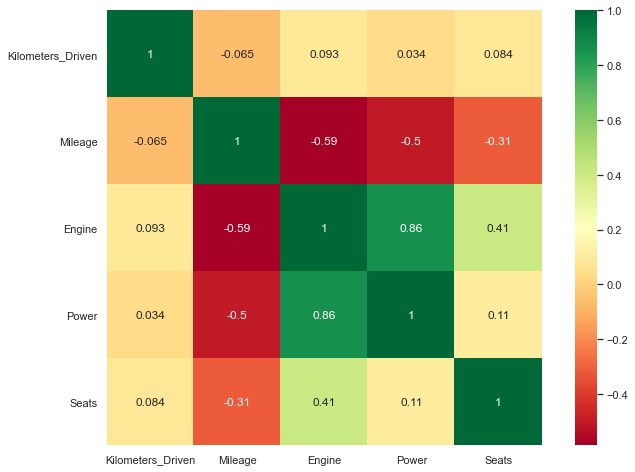

In [39]:
numeric_cols = ['Kilometers_Driven',"Mileage","Engine","Power",'Seats']
corr_mat = df[numeric_cols].corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, square=True,cmap='RdYlGn');

### Additional Visual Graphs

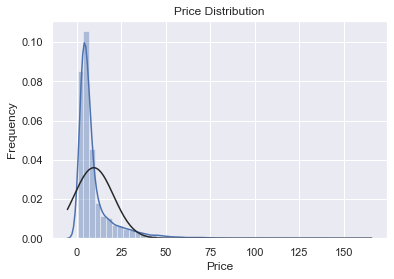

In [40]:
sns.distplot(df['Price'] , fit=norm);
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show();

* Price distribution graph is right-skewed, not normally distributed. Most of the prices between 0-25

In [41]:
y0 = df['Kilometers_Driven']
y1 = df['Mileage']
y2 = df['Engine']
y3 = df['Power']
y4= df['Price']
fig = go.Figure()
fig.add_trace(go.Box(y=y0, quartilemethod="linear", name="Kilometers_Driven"))
fig.add_trace(go.Box(y=y1, quartilemethod="linear", name="Mileage"))
fig.add_trace(go.Box(y=y2, quartilemethod="linear", name="Engine"))
fig.add_trace(go.Box(y=y3, quartilemethod="linear", name="Power"))
fig.add_trace(go.Box(y=y4, quartilemethod="linear", name="Price"))

fig.update_layout(title_text="Box Plot for Numeric Features using Plotly")
fig.show()

NameError: name 'go' is not defined

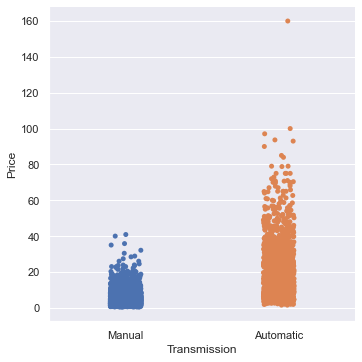

In [42]:
sns.catplot(x='Transmission',y='Price',data=df,jitter=0.1);

* Automatic cars are more expensive than manual ones.

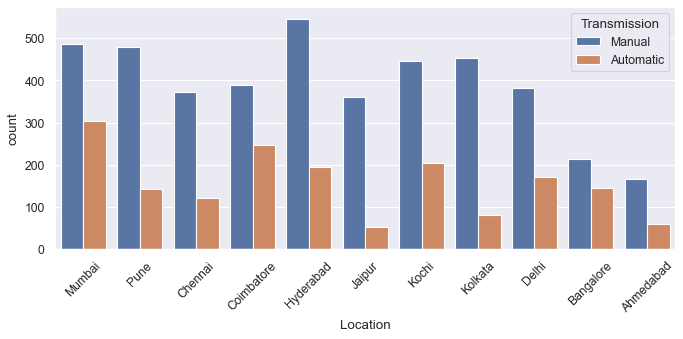

In [43]:
plt.figure(figsize=(10, 4), dpi=80)
sns.countplot(data=df, x="Location",hue="Transmission");
plt.xticks(rotation=45);

* In all cities, there are much more manual cars than automatic ones. Mumbai has the highest level of automatic cars

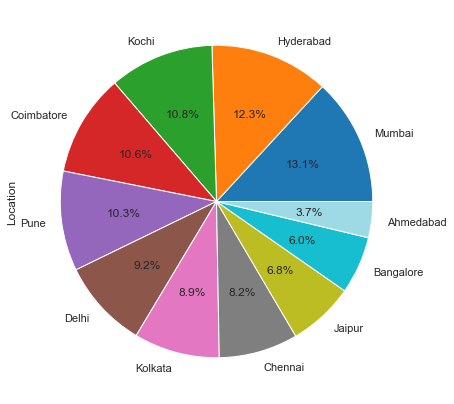

In [44]:
plt.figure(1, figsize=(7,10))
df['Location'].value_counts().plot.pie(autopct="%1.1f%%",cmap="tab20")
plt.show()

* Mumbai, Hyderabad and Kochi covers about 35% samples in the dataset.

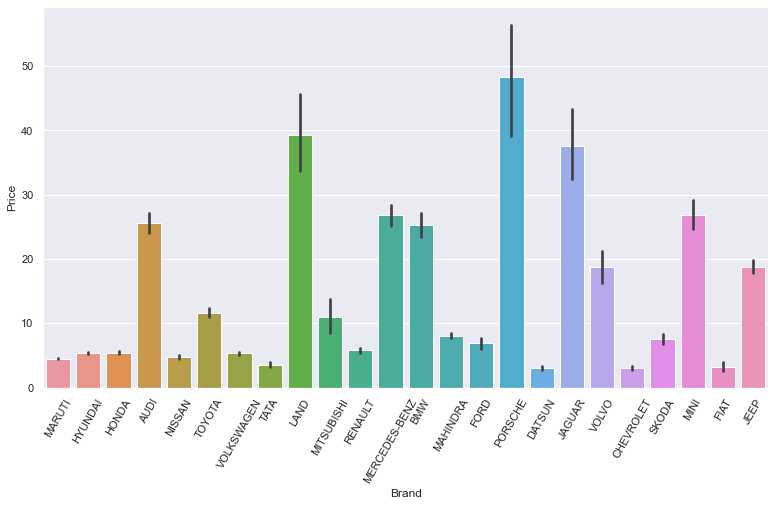

In [45]:
plt.figure(figsize=(13,7))
sns.barplot(data=df,x='Brand',y='Price')
plt.xticks(rotation=60);

* Porsche, Jaguar, Land, Audi and Mini are the top five most expensive car brands in the dataset.

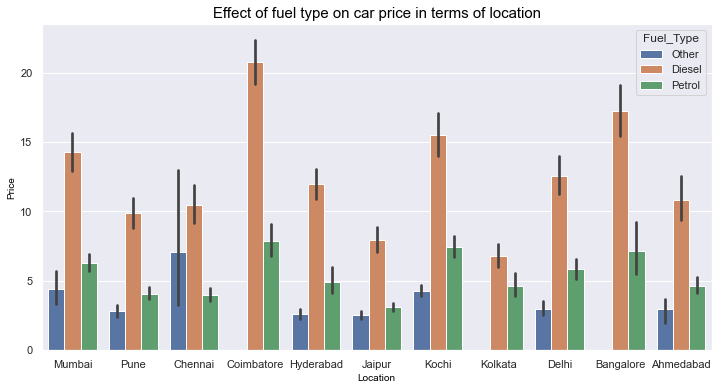

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Price",x='Location',hue='Fuel_Type')
plt.xlabel("Location",size=10,c="black")
plt.ylabel("Price",size=10,c="black")
plt.title("Effect of fuel type on car price in terms of location",size=15,c="black")
plt.show()

* The figure above shows that price of diesel car is more than petrol according to the location.
* Diesel cars are always more expensive than the other types of fuels in every city of India.

### Dealing with Outliers
* In order to deal with the outliers, z-score technique by using threshold as 3 sigma is used and about 500 rows are marked as outliers and dropped from the original dataset.

In [47]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,Other,Manual,First,26.60,998.0,58.16,5.0,1.75,MARUTI
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,HYUNDAI
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,HONDA
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,MARUTI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,AUDI


In [48]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  6008
After dropping numerical outliers, length of the dataframe is:  5590


### Scaling the Numerical Features
* MinMaxScaler is used to put all those numeric features into same range to reduce the impacts of outliers and standard deviation.

In [49]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,Other,Manual,First,26.60,998.0,58.16,5.0,1.75,MARUTI
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,HYUNDAI
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,HONDA
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,MARUTI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,AUDI


In [50]:
numeric_cols = ['Kilometers_Driven',"Mileage","Engine","Power",'Seats'] #Scaling numerical columns
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in numeric_cols:
    df[i] = scaling(i)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,0.239567,Other,Manual,First,0.779992,0.296036,0.103813,0.333333,1.75,MARUTI
1,Pune,2015,0.136174,Diesel,Manual,First,0.486223,0.482737,0.398614,0.333333,12.50,HYUNDAI
2,Chennai,2011,0.152850,Petrol,Manual,First,0.423908,0.360294,0.236135,0.333333,4.50,HONDA
3,Chennai,2012,0.289595,Diesel,Manual,First,0.532853,0.375959,0.236395,1.000000,6.00,MARUTI
4,Coimbatore,2013,0.135074,Diesel,Automatic,Second,0.296736,0.606138,0.461872,0.333333,17.74,AUDI


### One-Hot Encoding Technique for Categorical Features
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in regression models.

In [51]:
dummy_df_location = pd.get_dummies(df["Location"],dtype=np.int64,prefix="Location_is")
dummy_df_fuel = pd.get_dummies(df["Fuel_Type"],dtype=np.int64,prefix="Fuel_Type_is")
dummy_df_transmission = pd.get_dummies(df["Transmission"],drop_first=True,dtype=np.int64,prefix="Transmission_is")
dummy_df_owner = pd.get_dummies(df["Owner_Type"],dtype=np.int64,prefix="Owner_Type_is")
dummy_df_brand = pd.get_dummies(df["Brand"],dtype=np.int64,prefix="Brand_is")
dummy_df_year = pd.get_dummies(df["Year"],dtype=np.int64,prefix="Year_is")

df = pd.concat([df,dummy_df_location,dummy_df_fuel,dummy_df_transmission,dummy_df_owner,dummy_df_brand,dummy_df_year],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['Location', 'Fuel_Type','Transmission','Owner_Type','Brand','Year'],axis=1)

df.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_is_Ahmedabad,Location_is_Bangalore,Location_is_Chennai,Location_is_Coimbatore,...,Year_is_2011,Year_is_2012,Year_is_2013,Year_is_2014,Year_is_2015,Year_is_2016,Year_is_2017,Year_is_2018,Year_is_2019,Year_is_Less than 2004
0,0.239567,0.779992,0.296036,0.103813,0.333333,1.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.136174,0.486223,0.482737,0.398614,0.333333,12.50,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.152850,0.423908,0.360294,0.236135,0.333333,4.50,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0.289595,0.532853,0.375959,0.236395,1.000000,6.00,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0.135074,0.296736,0.606138,0.461872,0.333333,17.74,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Dropping Highly-Correlated Features
* Dropping the features that are 0.7 or above correlated are dropped.

In [52]:
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.70)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.70)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 65 columns.
The reduced dataframe has 61 columns.


## Train-Test Split
* Splitting the dataset into training and testing as 80% training and 20% testing

In [53]:
X = reduced_df.drop(["Price"],axis=1)
y = reduced_df["Price"]
X_train , X_test , y_train ,y_test = train_test_split(X ,y , test_size = 0.20 , random_state = 0)

Y_test = y_test


# y_test=(np.array(y_test))

# X_test=(np.array(X_test))

# y_train=(np.array(y_train))

# X_train=(np.array(X_train))




## 1- Decision Tree Regression

In [54]:
%%time
dt_model = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
r2_test = r2_score(y_test,y_pred_dt)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_dt))
rmse_train = np.sqrt(mean_squared_error(y_train , dt_model.predict(X_train)))
r2_train = r2_score(y_train , dt_model.predict(X_train))

Wall time: 119 ms


In [55]:
print("R2 Score for Test Set of Decision Tree Regression Model: ",round(r2_test,3))
print("R2 Score for Train Set of Decision Tree Regression Model: ",round(r2_train,3))
print("RMSE for Test Set of Decision Tree Regression Model: ",round(rmse_test,3))
print("RMSE for Train Set of Decision Tree Regression Model: ",round(rmse_train,3))

R2 Score for Test Set of Decision Tree Regression Model:  0.74
R2 Score for Train Set of Decision Tree Regression Model:  1.0
RMSE for Test Set of Decision Tree Regression Model:  3.832
RMSE for Train Set of Decision Tree Regression Model:  0.016


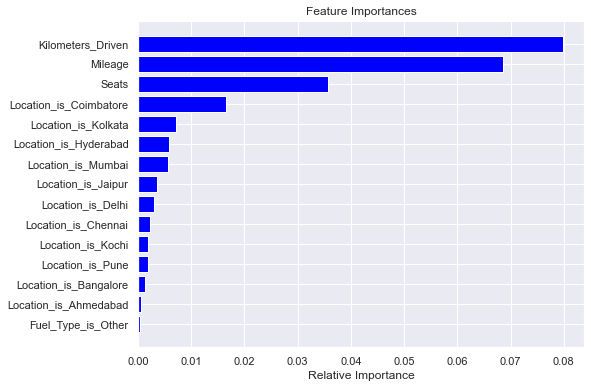

In [56]:
importances = dt_model.feature_importances_[0:15]
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* For decision tree model, <b> 'Mileage', 'Kilometers_Driven', 'Seats' , 'Location_is_Coimbatore' and 'Location_is_Kolkata' </b> are the top most important five features while learning the patterns from the given dataset.

## 2- Random Forest Regression

In [60]:
%%time
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
# print(rf_model)
r2_test = r2_score(y_test,y_pred_rf)
# print(r2_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_rf))
# print(rmse_test)
rmse_train = np.sqrt(mean_squared_error(y_train , rf_model.predict(X_train)))
# print(rmse_train)
r2_train = r2_scprintore(y_train , rf_model.predict(X_train))
# print(r2_train)

NameError: name 'r2_scprintore' is not defined

In [63]:
R0 = round(r2_test,3)
print("R2 Score for Test Set of Random Forest Regression Model: ",R0)
print("R2 Score for Train Set of Random Forest Regression Model: ",round(r2_train,3))
print("RMSE for Test Set of Random Forest Regression Model: ",round(rmse_test,3))
print("RMSE for Train Set of Random Forest Regression Model: ",round(rmse_train,3))

R2 Score for Test Set of Random Forest Regression Model:  0.85
R2 Score for Train Set of Random Forest Regression Model:  1.0
RMSE for Test Set of Random Forest Regression Model:  2.912
RMSE for Train Set of Random Forest Regression Model:  1.1


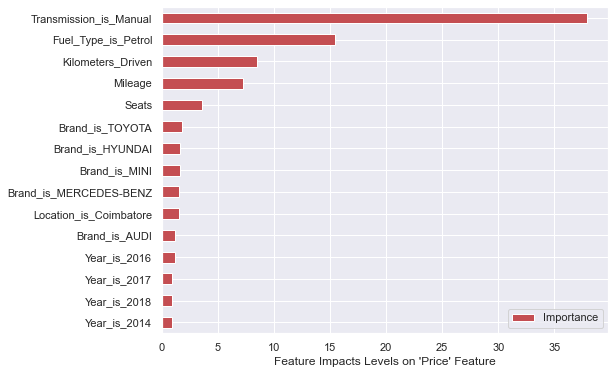

In [64]:
Importance = pd.DataFrame({"Importance":rf_model.feature_importances_*100},index=X_train.columns)
Importance.nlargest(15,columns="Importance").sort_values(by="Importance",axis=0, ascending=True).plot(kind="barh",color="r",figsize=(8,6))
plt.xlabel("Feature Impacts Levels on 'Price' Feature");

* For random forest model, <b> 'Transmission_is_Manual', 'Fuel_Type_is_Petrol', 'Kilometers_Driven' , 'Mileage' and 'Seats' </b> are the top most important five features while learning the patterns from the given dataset.

## 3- Gradient Boosting Regression

In [65]:
%%time
gbm_model = GradientBoostingRegressor(random_state=42).fit(X_train,y_train)
y_pred_gbm = gbm_model.predict(X_test)
r2_test = r2_score(y_test,y_pred_gbm)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_gbm))
rmse_train = np.sqrt(mean_squared_error(y_train , gbm_model.predict(X_train)))
r2_train = r2_score(y_train , gbm_model.predict(X_train))
print(r2_train)

0.8479045246701871
Wall time: 1.2 s


In [66]:
print("R2 Score for Test Set of Gradient Boosting Regression Model: ",round(r2_test,3))
print("R2 Score for Train Set of Gradient Boosting Regression Model: ",round(r2_train,3))
print("RMSE for Test Set of Gradient Boosting Regression Model: ",round(rmse_test,3))
print("RMSE for Train Set of Gradient Boosting Regression Model: ",round(rmse_train,3))

R2 Score for Test Set of Gradient Boosting Regression Model:  0.804
R2 Score for Train Set of Gradient Boosting Regression Model:  0.848
RMSE for Test Set of Gradient Boosting Regression Model:  3.325
RMSE for Train Set of Gradient Boosting Regression Model:  3.001


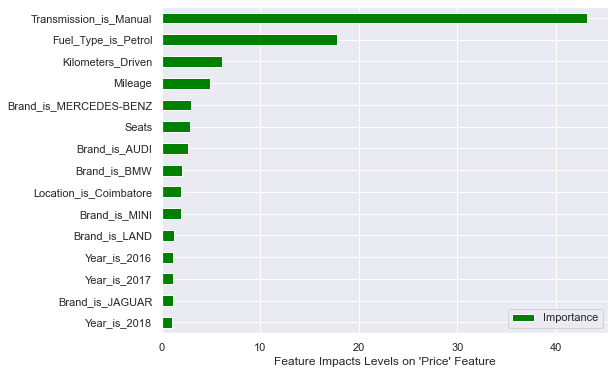

In [67]:
Importance = pd.DataFrame({"Importance":gbm_model.feature_importances_*100},index=X_train.columns)
Importance.nlargest(15,columns="Importance").sort_values(by="Importance",axis=0, ascending=True).plot(kind="barh",color="green",figsize=(8,6))
plt.xlabel("Feature Impacts Levels on 'Price' Feature");

* For gradient boosting model, <b> 'Transmission_is_Manual', 'Fuel_Type_is_Petrol', 'Kilometers_Driven' , 'Mileage' and 'Brand_is_MERCEDES-BENZ' </b> are the top most important five features while learning the patterns from the given dataset.

## Model Comparisons

In [68]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree Regression','Random Forest Regression',
                                          'Gradient Boosting Regression'], 
                                 'R2_Score':[0.68,0.841,0.796], 
                                 'RMSE':[4.141,2.918,2.979],
                                'Run Time':['63 ms','2.96 s','717 ms']}) 
comparison_frame

,Model,R2_Score,RMSE,Run Time
0,Decision Tree Regression,0.680,4.141,63 ms
1,Random Forest Regression,0.841,2.918,2.96 s
2,Gradient Boosting Regression,0.796,2.979,717 ms


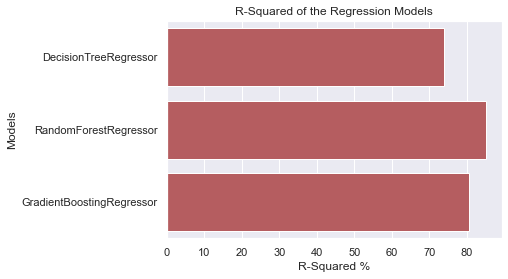

In [69]:
models = [dt_model,rf_model,gbm_model]

result = []
results = pd.DataFrame(columns= ["Models","R-Squared"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)    
    result = pd.DataFrame([[names, r_squared*100]], columns= ["Models","R-Squared"])
    results = results.append(result)
    
    
sns.barplot(x= 'R-Squared', y = 'Models', data=results, color="r")
plt.xlabel('R-Squared %')
plt.title('R-Squared of the Regression Models');

## Model Optimization for The Best Model (Random Forest Regressor)

### 1-GridSearchCV HyperParameter Tuning Method

In [ ]:
rf_params = {'max_depth':[10,20,25],'max_features':[2,3,5,15],'n_estimators':[200,500,750],'min_samples_split':[10,12,15]}

rf_model2 = RandomForestRegressor(random_state=42)
rf_cv_model = GridSearchCV(rf_model2,rf_params,cv=5,n_jobs=-1)
rf_cv_model.fit(X_train,y_train)

In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_model_tuned = RandomForestRegressor(max_depth=25,max_features=15,min_samples_split=10,n_estimators=750,random_state=42).fit(X_train,y_train)
y_pred_rf_tuned = rf_model_tuned.predict(X_test)
r2_test = r2_score(y_test,y_pred_rf_tuned)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_rf_tuned))
rmse_train = np.sqrt(mean_squared_error(y_train , rf_model_tuned.predict(X_train)))
r2_train = r2_score(y_train , rf_model_tuned.predict(X_train))

In [ ]:
R1 = round(r2_test,3)
print("R2 Score for Test Set of Random Forest Regression Model: ",R1)
print("R2 Score for Train Set of Random Forest Regression Model: ",round(r2_train,3))
print("RMSE for Test Set of Random Forest Regression Model: ",round(rmse_test,3))
print("RMSE for Train Set of Random Forest Regression Model: ",round(rmse_train,3))

In [ ]:
### 2-RandomizedSearchCV HyperParameter Tuning Method

In [ ]:
rf_params = {'max_depth':[10,20,25],'max_features':[2,3,5,15],'n_estimators':[200,500,750],'min_samples_split':[10,12,15]}

rf_model_cv = RandomForestRegressor(random_state=42)
rf_cv_model_rnd = RandomizedSearchCV(rf_model_cv,param_distributions=rf_params,cv=5,n_jobs=-1,n_iter=5)
rf_cv_model_rnd.fit(X_train,y_train)

In [ ]:
rf_cv_model_rnd.best_params_

In [ ]:
rf_model_tuned_rnd = RandomForestRegressor(max_depth=20,max_features=15,min_samples_split=10,n_estimators=750,random_state=42).fit(X_train,y_train)
y_pred_rf_tuned_rnd = rf_model_tuned_rnd.predict(X_test)
r2_test = r2_score(y_test,y_pred_rf_tuned_rnd)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_rf_tuned_rnd))
rmse_train = np.sqrt(mean_squared_error(y_train , rf_model_tuned_rnd.predict(X_train)))
r2_train = r2_score(y_train , rf_model_tuned_rnd.predict(X_train))

In [ ]:
R2 = round(r2_test,3) 
print("R2 Score for Test Set of Random Forest Regression Model: ",R2 )
print("R2 Score for Train Set of Random Forest Regression Model: ",round(r2_train,3))
print("RMSE for Test Set of Random Forest Regression Model: ",round(rmse_test,3))
print("RMSE for Train Set of Random Forest Regression Model: ",round(rmse_train,3))

## Final Comparison Table

In [ ]:
comparison_frame2 = pd.DataFrame({'Model':['Random Forest Regression (Default Parameters)',
                                          'Random Forest Regression (GridSearchCV Parameters)',
                                          'Random Forest Regression (RandomizedSearchCV Parameters)'], 
                                 'R2_Score':[0.841,0.845,0.841], 
                                 'RMSE':[2.918,2.880,2.919]}) 
comparison_frame2

In [118]:
# y_test convert to the binry clasification form 
Max  = (max(y_pred_dt))
res = []
for val in y_pred_dt:
    res.append(val/Max)
y_test = np.array(res)

# in to int
y_test = [int(x) for x in y_test]
y_test = np.array(y_test)



# Computing AUROC and ROC curve values


In [119]:
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate AUROC

## ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [106]:

r_auc = roc_auc_score(y_test, y_pred_dt, multi_class='ovr')
rf_auc = roc_auc_score(y_test, y_pred_rf, multi_class='ovr')
nb_auc = roc_auc_score(y_test, y_pred_gbm, multi_class='ovr')

# Print AUROC scores

In [107]:

print('Random Forest Regression Default Parameters: AUROC = %.3f' % (r_auc))
print('Random Forest Regression GridSearchCV Parameters: AUROC = %.3f' % (rf_auc))
print('Random Forest Regression RandomizedSearchCV Parameters: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest Regression Default Parameters: AUROC = 1.000
Random Forest Regression GridSearchCV Parameters: AUROC = 0.994
Random Forest Regression RandomizedSearchCV Parameters: AUROC = 1.000


# Calculate ROC curve

In [108]:

r_fpr, r_tpr, _ = roc_curve(y_test, y_pred_dt)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_pred_gbm)


In [109]:
import matplotlib.pyplot as plt

# Plot the ROC curve

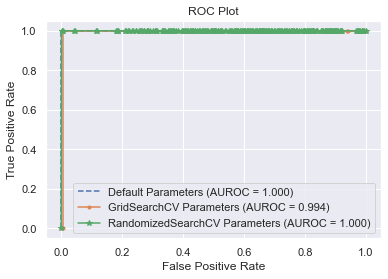

In [117]:


plt.plot(r_fpr, r_tpr, linestyle='--', label='Default Parameters (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='GridSearchCV Parameters (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='*', label='RandomizedSearchCV Parameters (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()



## Interpretation and Recommendations
* Decision Tree, Random Forest and Gradient Boosting Regressor algorithms have been applied to the given dataset after required data preprocessing steps.
* In data preprocessing phase, many different techniques such as outlier detection, missing value threatment, scaling and one-hot encoding methods are used to make the dataset is usable efficiently in the models.
* According to the visual findings above, the price can be changable in terms of many different features from the dataset like "Mileage","Engine" or "Brand". More detailed findings can be gathered above.
* R2_Score and RMSE (Root-Mean Squared Error) model performance metrics are used in all three models to measure the model's success so accordingly, Random Forest is performed the best among other 2 algorithms.
* In order to increase the model performance by applying model optimization technique, GridSearchCV and RandomizedSearchCV techniques are used to Random Forest model. GridSearchCV technique slightly increased the model's performance in terms of R2_Score and RMSE metrics. Run time for each model is also performed and decision tree works faster than the other two algorithms.
* As already explained above, all models have chosen different most important features but all models choose "Mileage" and "Kilometers_Driven" as the most important feature.
* In terms of pros and cons of each model, using only "Decision Tree" wouldn't be good choice because the algorithm creates one tree and make predictions accordingly. That feature makes decision tree algorithm faster than the others but not as trustworthy as others. Random Forest and Gradient Boosting algorithms are called ensemble-based learning algorithms. They create more trees called "forest" and take every decision from each tree so it's more robust and trustworthy. The only cons of those algorithms is they work slower than decision tree but it's always good to choose that sort of algorithms for modeling.